# Ecuaciones diferenciales con la libreria Sympy

Aquí se da un breve repaso de cómo resolver ecuaciones diferenciales haciendo uso de la librería Sympy de Python y se resolverán los siguientes tipos de ecuaciones diferenciales.

*   Ecuaciones diferenciales ordinarias de variable separable
*   Ecuaciones diferenciales ordinarias Homogeneas
*   Ecuaciones diferenciales ordinarias Exactas
*   Factor de integración
*   Ecuaciones diferenciales ordinarias lineales
*   Ecuaciones diferenciales ordinarias de Bernoulli


Para una fácil comprensión primero comenzaremos con las ecuaciones diferenciales de variable separable y después se procederá con los otros tipos de ecuaciones diferenciales.


# Ecuaciones diferenciales ordinarias de variable separable

Sí de la ecuación diferencial ordinaria de primer orden y primer grado, que es:

$$\dfrac{dy}{dx}=f(x,y)$$

Si $f(x,y)$ se puede expresar como un producto de las funciones $M(x)$ y $N(y)$ de la siguiente manera:

$$M(x)dx+N(y)dy=0$$

Entonces a la ecuación se le denomina ecuación diferencial ordinaria de variable separable y la solución general se obtiene por integración directa, es decir:

$$\int M(x)dx+\int N(y)dy=c$$

**Ejercicio 1:** Resolver la siguiente ecuación diferencial.

$$-(x^2y+x^2)dx+\sqrt{1+x^3}dy=0$$

**Solución:**

**Paso 1.** Reescribiremos la ecuación diferencial de la forma $\dfrac{dy}{dx}=f(x,y)$ o sea:

$$\dfrac{dy}{dx}=\dfrac{x^2y+x^2}{\sqrt{1+x^3}}$$

**Paso 2.** Definimos las variables de la ecuación diferencial.

In [ ]:
from sympy import *

y = Function("y")
x = symbols("x")

**Paso 3.** Escribimos la ecuación diferencial.

Para escribir la ecuación diferencial se utiliza la función Eq.

```
Eq(miembro_izquierdo_de_la_igualdad , miembro_derecho_de_la_igualdad)
```



In [ ]:
edo = Eq(diff(y(x),x),(y(x)*x**2+x**2)/sqrt(1+x**3))
edo

Eq(Derivative(y(x), x), (x**2*y(x) + x**2)/sqrt(x**3 + 1))

**Paso 4.** Para resolver la ecuación diferencial se utiliza la función:

```
dsolve(ecuacion_diferencial,variable_dependiente)
```



In [ ]:
dsolve(edo,y(x))

Eq(y(x), C1*exp(2*sqrt(x**3 + 1)/3) - 1)

Esta última expresión es la solución general de la ecuación diferencial.

**Ejercicio 2.** Resolver la siguiente ecuación diferencial.

$$\dfrac{dy}{dx}=-\dfrac{e^{2x-y}}{e^{y-2x}}$$

**Solución**

**Paso 1.** Escribir la ecuación en la forma $\dfrac{dy}{dx}=f(x,y)$

En este caso no hace falta, ya que la ecuación está escrita en la forma deseada.

**Paso 2.** Definir la variables de la ecuación diferencial.

In [ ]:
y = Function("y")
x = symbols("x")

**Paso 3.** Escribimos la ecuación diferencial.

In [ ]:
edo2 = Eq( diff(y(x),x),-(exp(2*x-y(x))/exp(y(x)-2*x)) )
edo2

Eq(Derivative(y(x), x), -exp(4*x - 2*y(x)))

**Paso 4.** Escribimos la solución de la ecuación diferencial.

In [ ]:
dsolve(edo2,y(x))

[Eq(y(x), log(-sqrt(C1 - 2*exp(4*x))) - log(2)),
 Eq(y(x), log(C1 - 2*exp(4*x))/2 - log(2))]

En este caso, nos imprime una lista con dos soluciones y para acceder a la primera solución se utilizan los corchetes y se escribe el índice que en este caso será cero para la primera solución.

In [ ]:
dsolve(edo2,y(x))[0]

Eq(y(x), log(-sqrt(C1 - 2*exp(4*x))) - log(2))

**Ejercicio 3.** Resolver la siguiente ecuación diferencial.

$$e^y\Big(\dfrac{dy}{dx}+1\Big)=1$$

**Solución**


**Paso 1.** Escribir la ecuación en la forma $\dfrac{dy}{dx}=f(x,y)$

$$\dfrac{dy}{dx}+1=\dfrac{1}{e^y}$$
$$\dfrac{dy}{dx}=\dfrac{1}{e^y}-1$$
$$\dfrac{dy}{dx}=\dfrac{1}{e^y}-\dfrac{e^y}{e^y}$$
$$\dfrac{dy}{dx}=\dfrac{1-e^y}{e^y}$$

**Paso 2.** Definir las variables de la ecuación diferencial.

In [ ]:
y = Function("y")
x = symbols("x")

**Paso 3.** Escribimos la ecuación diferencial.

In [ ]:
edo3 = Eq( diff(y(x),x),(1-exp(y(x)))/(exp(y(x))) )
edo3

Eq(Derivative(y(x), x), (1 - exp(y(x)))*exp(-y(x)))

**Paso 4.** Escribimos la solución de la ecuación diferencial.

In [ ]:
dsolve(edo3,y(x))

Eq(y(x), log(C1*exp(-x) + 1))

Hasta ahora solo se han obtenido las soluciones generales de las ecuaciones diferenciales, pero las soluciones generales son una familia de soluciones de la ecuación diferencial con parámetro $C_1$ y para determinar el valor de $C_1$ se evalúa una condición inicial.

Para agregar las condiciones iniciales haciendo uso de la librería Sympy se utiliza un pequeño diccionario y que en este caso llamaremos ```ci``` (condición inicial).
```
ci = {y(a):b} # ci : condicion inicial
```
Y a su vez, para agregar esta condición inicial en la solución de la ecuación diferencial, se va a aguardar el diccionario en la variable ```ics ```.
```
dsolve(ecuacion_diferencial , variable_dependiente , ics = ci)
```

**Ejercicio 1**

Resuelva la ecuación diferencial sujeta a la condición inicial.

$$y-x\dfrac{dy}{dx}=3(1+x^2y) \hspace{1cm}y(1)=2$$

**Solución**

**Paso 1.**
Escribimos la ecuación en la forma $\dfrac{dy}{dx}=f(x,y)$  definimos las variables y escribimos la ecuación diferencial.

$$\dfrac{dy}{dx}=\dfrac{3(1+x^2y)-y}{-x}$$






In [ ]:
y = Function("y")
x = symbols("x")

Edo4 = Eq(diff(y(x),x),(3*(1+x**2*y(x))-y(x))/(-x))
Edo4

Eq(Derivative(y(x), x), -(3*x**2*y(x) - y(x) + 3)/x)

**Paso 2.** Definimos el diccionario con la condición inicial.

In [ ]:
ci = {y(1):2}

**Paso 3.** Escribimos la solución de la ecuación diferencial con las condiciones iniciales.

In [ ]:
dsolve(Edo4,y(x),ics=ci)

Eq(y(x), -3*sqrt(6)*sqrt(pi)*x*exp(-3*x**2/2)*erfi(sqrt(6)*x/2)/2 + x*(-exp(3/2) + 3*sqrt(6)*sqrt(pi)*erfi(sqrt(6)/2)/2)*exp(-3*x**2/2) + 3)

**Ejercicio 2**

Resuelva la ecuación diferencial sujeta a la condición inicial.

$$e^{-y}(1+\dfrac{dy}{dx})=1 \hspace{1cm}y(0)=1$$

**Solución**

**Paso 1.**
Escribimos la ecuación en la forma $\dfrac{dy}{dx}=f(x,y)$  definimos las variables y escribimos la ecuación diferencial.

$$\dfrac{dy}{dx}=e^y-1$$

In [ ]:
y = Function("y")
x = symbols("x")

Edo5 = Eq(diff(y(x),x),exp(y(x))-1)
Edo5

Eq(Derivative(y(x), x), exp(y(x)) - 1)

**Paso 2.** Definimos el diccionario con la condición inicial.

In [ ]:
ci2 = {y(0):1}

**Paso 3.** Escribimos la solución de la ecuación diferencial con las condiciones iniciales.

In [ ]:
dsolve(Edo5,y(x),ics=ci2)

Eq(x + y(x) - log(exp(y(x)) - 1), 1 - log(-1 + E))

Ya sabiendo la solución general y la solución particular, podemos graficar las soluciones.

**Ejercicio 1.**

Resuelva la ecuación diferencial sujeta a la condición inicial y haga la gráfica de la curva solución.

$$\dfrac{dy}{dx}=\dfrac{x^2}{y(1+x^3)} \hspace{1cm}y(0)=2$$

**Solución**

**Paso 1.**

Se definen las variables de la ecuación diferencial y en esta ocasión no se va a definir una variable que guarde el diccionario de la condición inicial, ni se va a definir una variable para que guarde la ecuación diferencial, sino que se va a definir dentro de la función ```Eq()```.

In [ ]:
from sympy import *

y = Function("y")
x = symbols("x")

sol = dsolve( Eq(diff(y(x),x),x**2/(y(x)*(1+x**3))) , y(x) , ics={y(0):2} )
sol

Eq(y(x), sqrt(6*log(x**3 + 1) + 36)/3)

**Paso 2.** Importamos las librerías para realizar gráficos.

Para realizar gráficas se importa la librería ```matplotlib``` y también se agrega la librería ```numpy```. Con ```numpy``` se puede crear el dominio de la función mediante una lista que llamaremos ```x1``` y con la función ```lambdify``` convertimos la solución simbólica que obtuvimos de la ecuación diferencial a una función que admita valores de punto flotante.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f = lambdify(x,sol.rhs,"numpy")

x1 = np.arange(0,10,0.01)
y1 = f(x1)

Por último, graficamos los puntos de la función, agregamos título y etiqueta de la función.

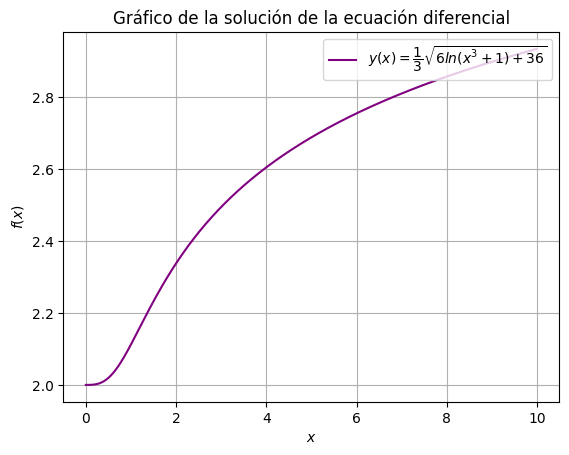

In [ ]:
plt.plot(x1,y1,color="purple",label="$y(x)=\dfrac{1}{3}\sqrt{6ln(x^3+1)+36}$")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
#plt.axis("equal")
plt.legend(loc="upper right")
plt.show()

**Ejercicio 2.**

Resuelva la ecuación diferencial sujeta a la condición inicial y haga la gráfica de la curva solución.

$$\dfrac{dy}{dx}=\dfrac{2x(1+e^y)}{(1+x^2)e^y} \hspace{1cm}y(1)=0$$

**Solución**

**Paso 1.**

Se definen las variables de la ecuación diferencial y en esta ocasión no se va a definir una variable que guarde el diccionario de la condición inicial, ni se va a definir una variable para que guarde la ecuación diferencial, sino que se va a definir dentro de la función ```Eq()```.

In [22]:
from sympy import *

y = Function("y")
x = symbols("x")

sol2 = dsolve( Eq(diff(y(x),x),(2*x*(1+exp(y(x))))/(exp(y(x))*(1+x**2))) , y(x) , ics={y(1):0} )
sol2

Eq(y(x), log(x**2))

**Paso 2.** Importamos las librerías para realizar gráficos.

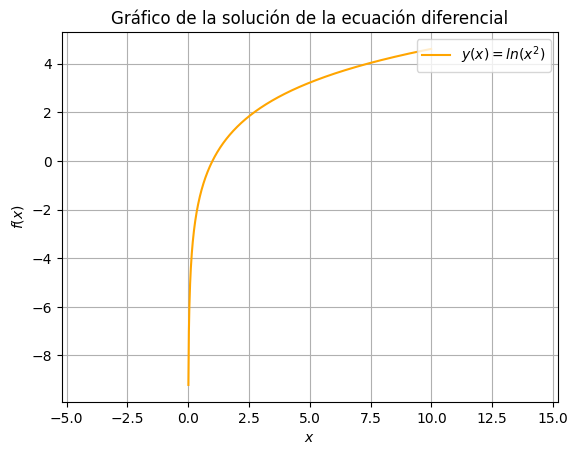

In [23]:
import matplotlib.pyplot as plt
import numpy as np

f2 = lambdify(x,sol2.rhs,"numpy")

x2 = np.arange(0.01,10,0.01)
y2 = f2(x2)

plt.plot(x2,y2,color="orange",label="$y(x)=ln(x^2)$")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
plt.axis("equal")
plt.legend(loc="upper right")
plt.show()

Ya se puede obtener la solución general, particular y la gráfica de una ecuación diferencial.
Otra manera de visualizar la familia de curvas solución de las ecuaciones diferenciales mediante el campo de direcciones de una ecuación diferencial.

Para graficar el campo de direcciones es con la funcion de la libreria matplotlib ```plt.quiver()```.

**Ejemplo:** Dibuje el campo de direcciones de la siguiente ecuación diferencial.

$$\dfrac{dy}{dx}=\dfrac{-xy}{(x^2+1)e^{y^2}}$$

**Solución**

**Paso 1.** Importamos las librerías ```numpy``` y ```matplotlib```.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Paso 2.** Definimos una malla con la función ```np.meshgrid()``` y le vamos a pasar como argumentos los límites que queremos graficar. Por ejemplo, vamos a graficar en la siguiente región $G = \{(x,y)\in \Re ^2 :-5\leq x\leq 5 \land -5\leq y \leq 5\}$ Estos límites los definimos usando la función ```np.linspace()```. También se puede usar la función, ```np.arange()``` pero en este caso solo usaremos. ```np.linspace()```

In [ ]:
x,y=np.meshgrid(np.linspace(-5,5,30),np.linspace(-5,5,30))

**Paso 3.** Por último, haremos uso de la función: ```plt.quiver()``` los primeros dos parámetros serán la malla, ```x,y``` el tercer parámetro será ```1``` y el último parámetro será la función $f(x,y)$ de la ecuación diferencial de la forma. $\dfrac{dy}{dx}=f(x,y)$

También se agregarán etiquetas y títulos a nuestro gráfico.

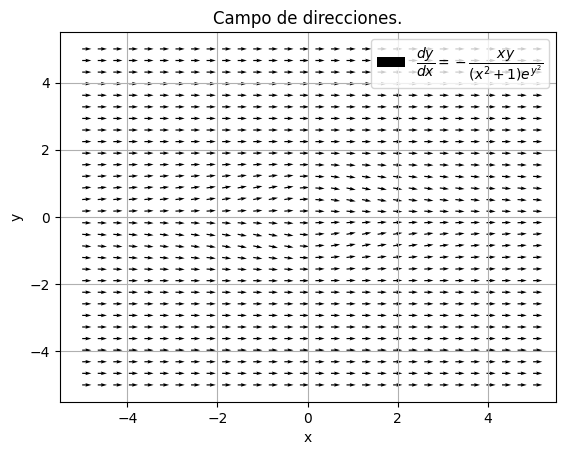

In [ ]:
plt.quiver(x,y,1,(-x*y)/((x**2+1)*np.exp(y*y)),label="$\dfrac{dy}{dx}=-\dfrac{xy}{(x^2+1)e^{y^2}}$")

plt.legend(loc="upper right")
plt.title("Campo de direcciones.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Para apreciar un poco mejor las direcciones, agregaremos un mapa de colores y eso lo haremos utilizando las funciones ```quiver``` y ```hypot``` para eso primero importamos las librerías ```numpy``` y ```matplotlib```.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

Definimos las variables ```fig , ax``` y también definimos la región de $\Re ^2$ que queremos graficar que, en este caso, será: $G=\{(x, y)\in \Re ^2 :-4\leq x \leq 4 , -4\leq y \leq 4 \}$

Una vez definida la región se procede a crear las variables ```U,V``` la variable ```U``` va a guardar el valor de $1$ y el valor de ```V``` va a guardar la expresión de la ecuación diferencial $f(x,y)$.

Con todo lo anterior definido, escribimos la siguiente línea para graficar el campo de direcciones. ```Q = ax.quiver(region , U , f(x,y) , units='x', scale , cmap)```

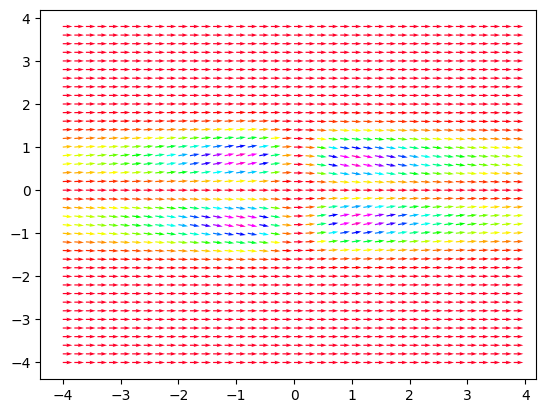

In [7]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(-4, 4, 0.2), np.arange(-4, 4, 0.2)) # Region de R2 que se grafica

U = 1
V = (-x*y)/((x**2+1)*np.exp(y*y)) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=6,cmap=cm.gist_rainbow)

Podemos incluir título y etiquetas, también podemos cambiar el mapa de color, como, por ejemplo, usar la tonalidad: ```jet```.

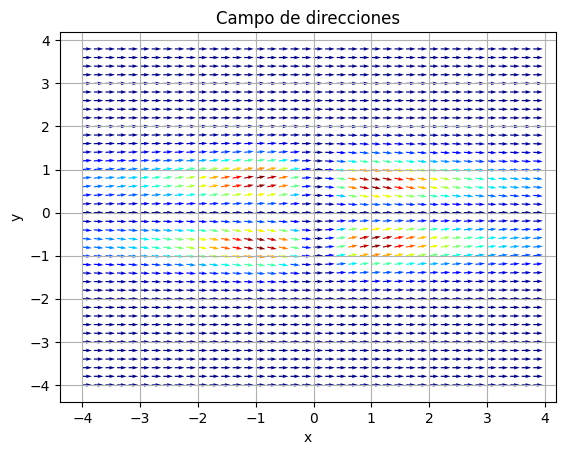

In [8]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(-4, 4, 0.2), np.arange(-4, 4, 0.2)) # Region de R2 que se grafica

U = 1
V = (-x*y)/((x**2+1)*np.exp(y*y)) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=6,cmap=cm.jet)

plt.title("Campo de direcciones")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

Ya con todo lo anterior visto, se mostrarán a continuación ejemplos de resolución y gráficas de las soluciones de ecuaciones diferenciales de distintos tipos.

## Ecuaciones diferenciales ordinarias homogéneas.

#Ejemplo 1.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$x\dfrac{dy}{dx}=y+2xe^{-y/x} \hspace{1cm} y(0.7)=2$$

**Solución.**

In [32]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

y = Function('y')
x = symbols('x')

Eq( diff(y(x),x),y(x)/x+2*exp(-y(x)/x))

Eq(Derivative(y(x), x), 2*exp(-y(x)/x) + y(x)/x)

In [33]:
dsolve( Eq( diff(y(x),x),y(x)/x+2*exp(-y(x)/x))  , y(x))

Eq(y(x), log((C1 + log(x**2))**x))

In [34]:
homogenea1 = dsolve( Eq( diff(y(x),x),y(x)/x+2*exp(-y(x)/x)) , y(x) , ics={y(0.7):2} )
homogenea1

Eq(y(x), log((log(x**2) + 18.1250579512051)**x))

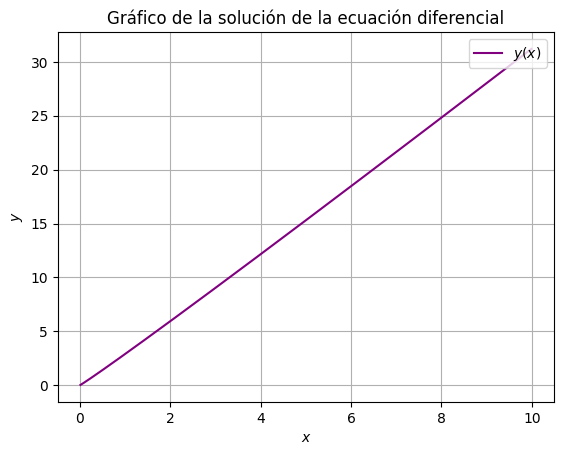

In [36]:
fh1 = lambdify(x , homogenea1.rhs,"numpy")

xh1 = np.arange(0.01,10,0.01)

yh1 = fh1( xh1 )

plt.plot( xh1 , yh1 ,color="purple",label="$y(x)$")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
plt.legend(loc="upper right")
plt.show()

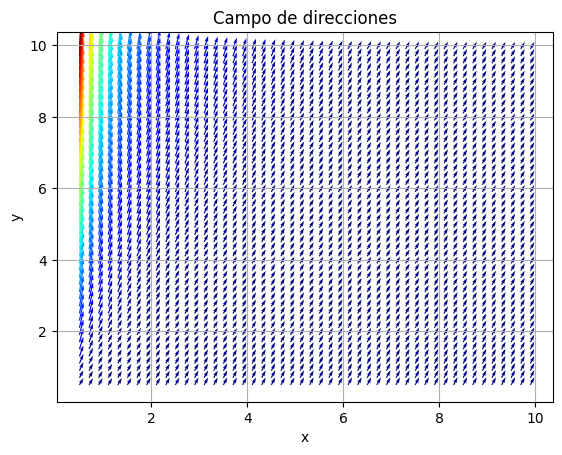

In [95]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(0.5, 10, 0.2), np.arange(0.5, 10, 0.2)) # Region de R2 que se grafica

U = 1.0
V = y/x+2*np.exp(-y/x) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=12,cmap=cm.jet)

plt.title("Campo de direcciones")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

# Ejemplo 2.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{2(2x^2+y^2)}{xy} \hspace{1cm} y(6.3)=1$$

**Solución.**

In [46]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

y = Function('y')
x = symbols('x')

Eq( diff(y(x),x),2*(2*x**2+y(x)**2)/(x*y(x)) )

Eq(Derivative(y(x), x), (4*x**2 + 2*y(x)**2)/(x*y(x)))

In [49]:
dsolve(  Eq( diff(y(x),x),2*(2*x**2+y(x)**2)/(x*y(x)) )  , y(x))[1]

Eq(y(x), x*sqrt(C1*x**2 - 4))

In [48]:
homogenea2 = dsolve( Eq( diff(y(x),x),2*(2*x**2+y(x)**2)/(x*y(x)) ) , y(x) , ics={y(6.3):1} )
homogenea2

Eq(y(x), 2*x*sqrt(0.0253539636135708*x**2 - 1))

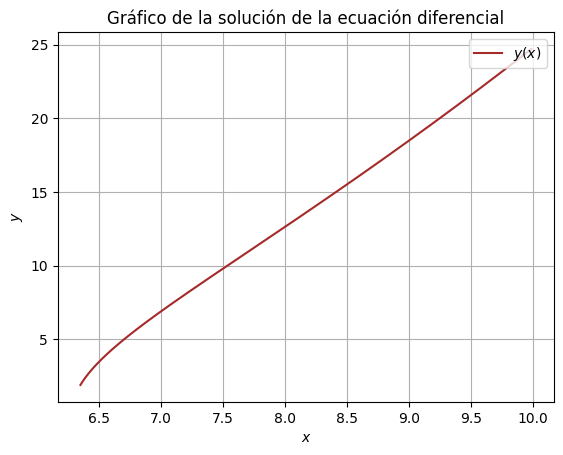

In [56]:
fh2 = lambdify(x , homogenea2.rhs,"numpy")

xh2 = np.arange(6.35,10,0.01)

yh2 = fh2( xh2 )

plt.plot( xh2 , yh2 ,color="brown",label="$y(x)$")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
plt.legend(loc="upper right")
plt.show()

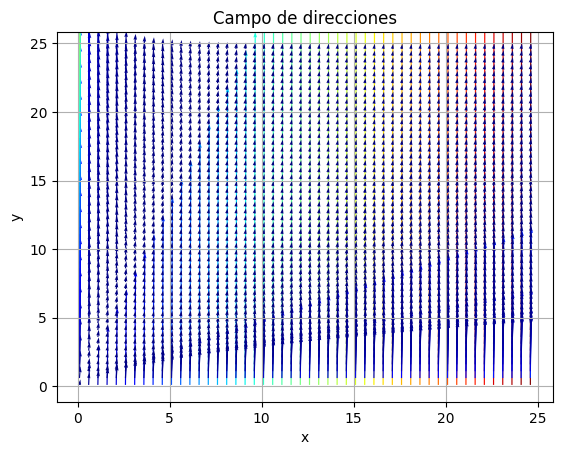

In [103]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(0.1, 25, 0.5), np.arange(0.1, 25, 0.5)) # Region de R2 que se grafica

U = 1.0
V = 2*(2*x**2+y**2)/(x*y) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=20,cmap=cm.jet)

plt.title("Campo de direcciones")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

# Ejemplo 3.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{4x^2+7xy+2y^2}{x^2} \hspace{1cm} y(7.5)=1.1$$

**Solución.**

In [67]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

y = Function('y')
x = symbols('x')

Eq( diff(y(x),x),(4*x*x+7*x*y(x)+2*y(x)**2)/(x**2)  )

Eq(Derivative(y(x), x), (4*x**2 + 7*x*y(x) + 2*y(x)**2)/x**2)

In [68]:
dsolve( Eq( diff(y(x),x),(4*x*x+7*x*y(x)+2*y(x)**2)/(x**2)  )  , y(x))

Eq(y(x), x*(-C1 - 2*x**2)/(C1 + x**2))

In [69]:
homogenea3 = dsolve( Eq( diff(y(x),x),(4*x*x+7*x*y(x)+2*y(x)**2)/(x**2)  ) , y(x) , ics={y(7.5):1.1} )
homogenea3

Eq(y(x), x*(105.30523255814 - 2*x**2)/(x**2 - 105.30523255814))

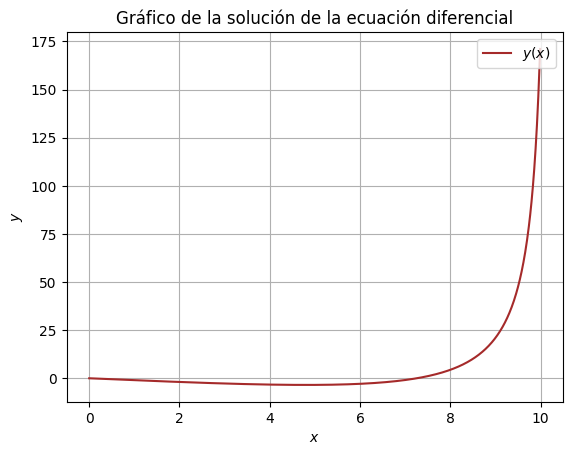

In [72]:
fh3 = lambdify(x , homogenea3.rhs,"numpy")

xh3 = np.arange(0,10,0.01)

yh3 = fh3( xh3 )

plt.plot( xh3 , yh3 ,color="brown",label="$y(x)$")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
plt.legend(loc="upper right")
plt.show()

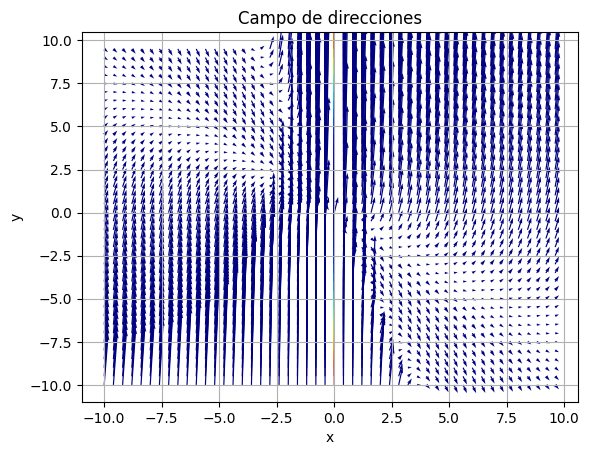

In [92]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(-10, 10, 0.4), np.arange(-10, 10, 0.5)) # Region de R2 que se grafica

U = 1.0
V = (4*x*x+7*x*y+2*y**2)/(x**2) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=5.9,cmap=cm.jet)

plt.title("Campo de direcciones")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()


## Ecuaciones diferenciales ordinarias exactas.

#Ejemplo 1.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{y/x+6x}{2-ln(x)} \hspace{1cm} y(3.3)=0.2$$

**Solución.**

In [104]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

y = Function('y')
x = symbols('x')

Eq( diff(y(x),x),(y(x)/x+6*x)/(2-log(x)) )

Eq(Derivative(y(x), x), (6*x + y(x)/x)/(2 - log(x)))

In [105]:
dsolve(   Eq( diff(y(x),x),(y(x)/x+6*x)/(2-log(x)) )  , y(x))

Eq(y(x), (C1 - 3*x**2)/(log(x) - 2))

In [106]:
exacta1 = dsolve(  Eq( diff(y(x),x),(y(x)/x+6*x)/(2-log(x)) ) , y(x) , ics={y(3.3):0.2} )
exacta1

Eq(y(x), (32.5087844936945 - 3*x**2)/(log(x) - 2))

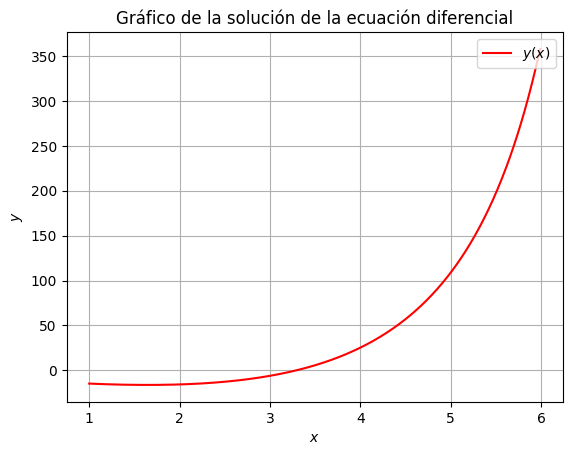

In [114]:
fe1 = lambdify(x , exacta1.rhs,"numpy")

xe1 = np.arange(1,6,0.01)

ye1 = fe1( xe1 )

plt.plot( xe1 , ye1 ,color="red",label="$y(x)$")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
plt.legend(loc="upper right")
plt.show()

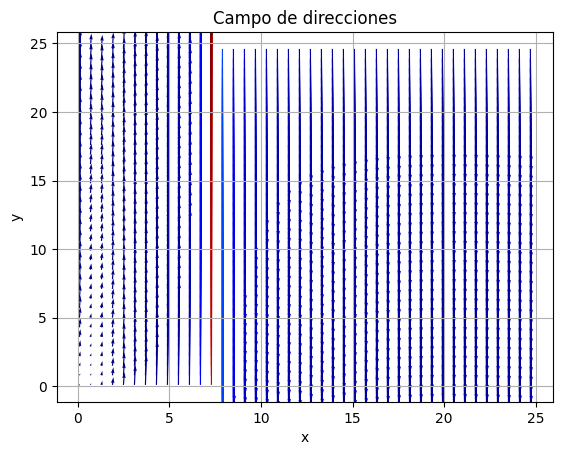

In [147]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(0.1, 25, 0.6), np.arange(0.1, 25, 0.7)) # Region de R2 que se grafica

U = 1.0
V = (y/x+6*x)/(2-np.log(x)) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=20 ,cmap=cm.jet)

plt.title("Campo de direcciones")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

#Ejemplo 2.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{-(xy^2+y^2+1)}{(x^2y+2xy+y)} \hspace{1cm} y(2.1)=3.2$$

**Solución.**

In [133]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

y = Function('y')
x = symbols('x')

Eq( diff(y(x),x),-(1+y(x)**2+x*y(x)**2)/(x**2*y(x)+y(x)+2*x*y(x)) )

Eq(Derivative(y(x), x), (-x*y(x)**2 - y(x)**2 - 1)/(x**2*y(x) + 2*x*y(x) + y(x)))

In [136]:
dsolve( Eq( diff(y(x),x),-(1+y(x)**2+x*y(x)**2)/(x**2*y(x)+y(x)+2*x*y(x)) )  , y(x))[1]

Eq(y(x), sqrt(C1 - 2*x)/(x + 1))

In [138]:
exacta2 = dsolve( Eq( diff(y(x),x),-(1+y(x)**2+x*y(x)**2)/(x**2*y(x)+y(x)+2*x*y(x)) ) , y(x) , ics={y(2.1):3.2} )
exacta2

Eq(y(x), 10.1294817241555*sqrt(1 - 0.0194919615150712*x)/(x + 1))

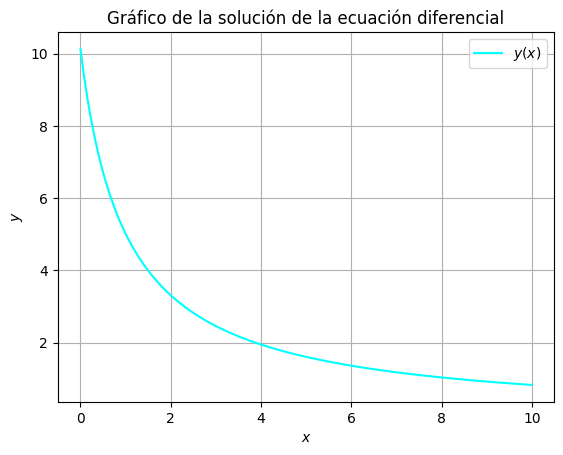

In [140]:
fe2 = lambdify(x , exacta2.rhs,"numpy")

xe2 = np.arange(0,10,0.01)

ye2 = fe2( xe2 )

plt.plot( xe2 , ye2 ,color="cyan",label="$y(x)$")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
plt.legend(loc="upper right")
plt.show()

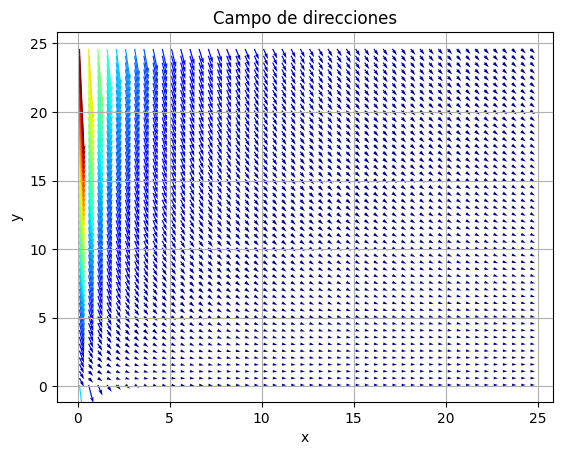

In [143]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(0.1, 25, 0.5), np.arange(0.1, 25, 0.5)) # Region de R2 que se grafica

U = 1.0
V = -(1+y**2+x*y**2)/(x**2*y+y+2*x*y) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=4,cmap=cm.jet)

plt.title("Campo de direcciones")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

#Ejemplo 3.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{-(2ln(5y)+1/x)}{2x/y} \hspace{1cm} y(3.7)=5.0$$

**Solución.**

In [153]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

y = Function('y')
x = symbols('x')

Eq( diff(y(x),x),-(2*log(5*y(x))+1/x)/(2*x/y(x)) )

Eq(Derivative(y(x), x), (-2*log(5*y(x)) - 1/x)*y(x)/(2*x))

In [154]:
dsolve(Eq( diff(y(x),x),-(2*log(5*y(x))+1/x)/(2*x/y(x)) )  , y(x))

Eq(y(x), exp(-(-C1 + log(x)/2)/x)/5)

In [156]:
exacta3 = dsolve( Eq( diff(y(x),x),-(2*log(5*y(x))+1/x)/(2*x/y(x)) ) , y(x) , ics={y(3.7):5} )
exacta3

Eq(y(x), exp(-(log(x)/2 - 12.5640069618374)/x)/5)

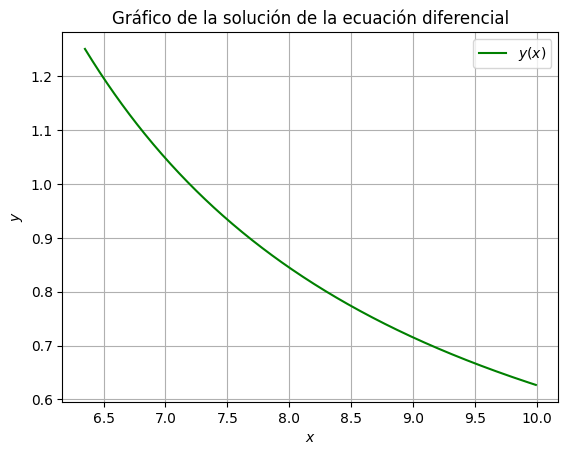

In [158]:
fe3 = lambdify(x , exacta3.rhs,"numpy")

xe3 = np.arange(6.35,10,0.01)

ye3 = fe3( xe3 )

plt.plot( xe3 , ye3 ,color="green",label="$y(x)$")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
plt.legend(loc="upper right")
plt.show()

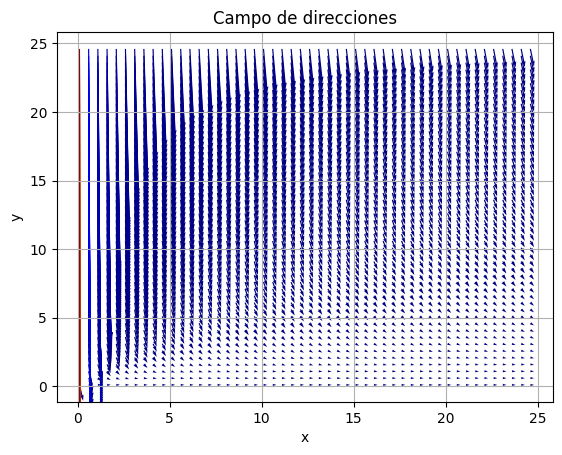

In [160]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(0.1, 25, 0.5), np.arange(0.1, 25, 0.5)) # Region de R2 que se grafica

U = 1.0
V = -(2*np.log(5*y)+1/x)/(2*x/y) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=5,cmap=cm.jet)

plt.title("Campo de direcciones")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

# Factor de integración

#Ejemplo 1.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{-(xy^3+1)}{x^2y^2} \hspace{1cm} y(3.9)=6.0$$

**Solución.**

In [161]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

y = Function('y')
x = symbols('x')

Eq( diff(y(x),x), -(x*y(x)**3+1)/(x**2*y(x)**2) )

Eq(Derivative(y(x), x), (-x*y(x)**3 - 1)/(x**2*y(x)**2))

In [163]:
dsolve( Eq( diff(y(x),x), -(x*y(x)**3+1)/(x**2*y(x)**2) )  , y(x))[0]

Eq(y(x), 2**(2/3)*((C1/x**2 - 3)/x)**(1/3)/2)

In [165]:
factor1 = dsolve( Eq( diff(y(x),x), -(x*y(x)**3+1)/(x**2*y(x)**2) ) , y(x) , ics={y(3.9):6.0} )
factor1

Eq(y(x), 2**(2/3)*((-3 + 25671.438/x**2)/x)**(1/3)/2)

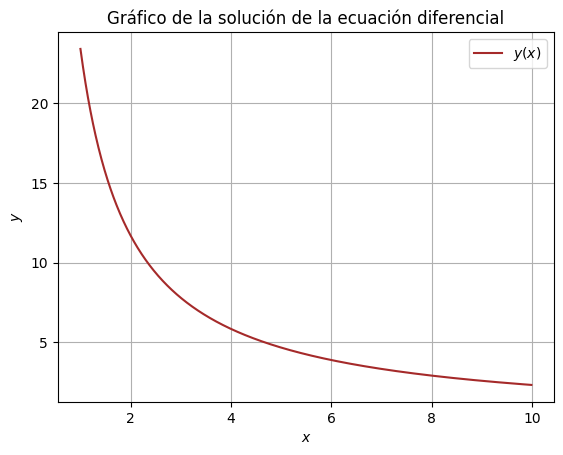

In [167]:
ff1 = lambdify(x , factor1.rhs,"numpy")

xf1 = np.arange(1,10,0.01)

yf1 = ff1( xf1 )

plt.plot( xf1 , yf1 ,color="brown",label="$y(x)$")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.title("Gráfico de la solución de la ecuación diferencial")
plt.legend(loc="upper right")
plt.show()

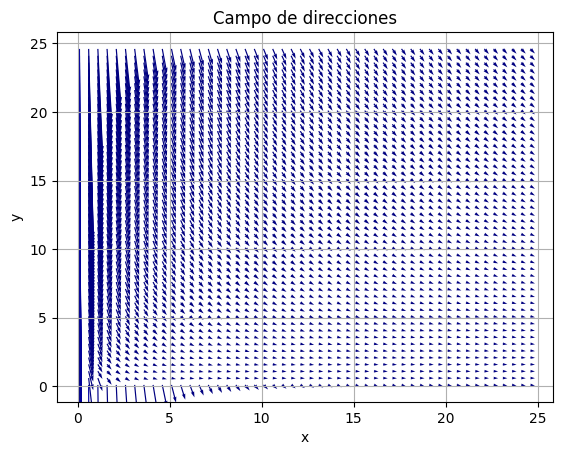

In [170]:
fig , ax = plt.subplots()
x , y = np.meshgrid(np.arange(0.1, 25, 0.5), np.arange(0.1, 25, 0.5)) # Region de R2 que se grafica

U = 1.0
V = -(x*y**3+1)/(x**2*y**2) # f(x,y)

M = np.hypot(U, V)

Q = ax.quiver(x,y, U, V, M, units='x',scale=4,cmap=cm.jet)

plt.title("Campo de direcciones")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

#Ejemplo 2.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{}{} \hspace{1cm} y()=$$

**Solución.**

#Ejemplo 3.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{}{} \hspace{1cm} y()=$$

**Solución.**

# Ecuaciones diferenciales ordinarias lineales

#Ejemplo 1.

Resolver la siguiente ecuación diferencial, graficar la función y graficar el campo de direcciones.

$$\dfrac{dy}{dx}=\dfrac{}{} \hspace{1cm} y()=$$

**Solución.**